In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

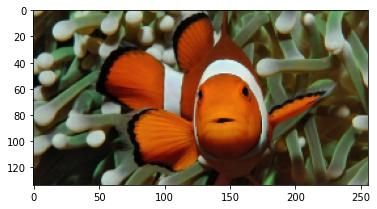

In [21]:
nemo_image = cv2.imread("inputs/nemo1.jpg")
nemo_image = cv2.resize(nemo_image, (0, 0), fx=0.25, fy=0.25)
nemo_image = cv2.cvtColor(nemo_image, cv2.COLOR_BGR2RGB)
plt.imshow(nemo_image)

In [22]:
def show_plot(a, b, c, px, m='.'):
    fig = plt.figure(figsize=(12, 6))
    axis = fig.add_subplot(1, 1, 1, projection='3d')
    axis.scatter(
        a.flatten(),
        b.flatten(),
        c.flatten(),
        facecolors=px,
        marker=m
    )
    plt.show()

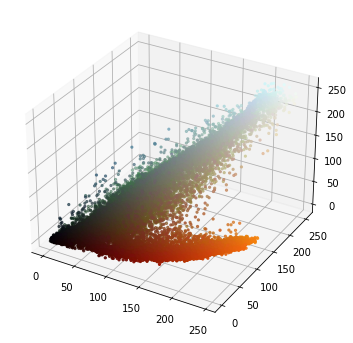

In [23]:
sh = nemo_image.shape[0] * nemo_image.shape[1]
px_colors = nemo_image.reshape((sh, 3)) / 255.0
r, g, b = cv2.split(nemo_image)

show_plot(r, g, b, px_colors)

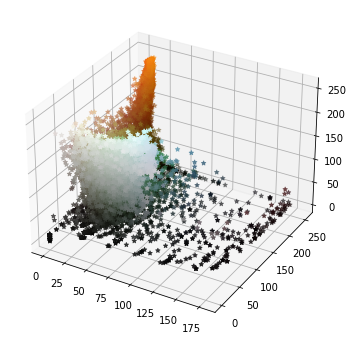

In [24]:
nemo_image_hsv = cv2.cvtColor(nemo_image, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(nemo_image_hsv)

show_plot(h, s, v, px_colors, '*')

In [25]:
mask_orange = cv2.inRange(nemo_image_hsv, (1, 190, 200), (18, 255, 255))
mask_white = cv2.inRange(nemo_image_hsv, (0, 200, 200), (145, 60, 255))
mask_black = cv2.inRange(nemo_image_hsv, (0, 0, 0), (255, 250, 5))

mask = mask_orange + mask_white + mask_black

In [26]:
X_train = np.array([h.flatten(), s.flatten(), v.flatten()]).T 
Y_train = np.zeros((nemo_image.shape[0] * nemo_image.shape[1], 1))
indexes = np.where(mask.flatten() != 0)
indexes = indexes[0]
Y_train[indexes] = 1
Y_train = Y_train.astype(dtype = 'uint8').flatten()

Y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [27]:
from knn import KNN 
knn_for_nemo = KNN(k=9)
knn_for_nemo.fit(X_train, Y_train)

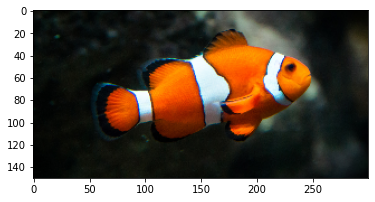

In [28]:
nemo2 = cv2.imread('inputs/nemo2.jpg')
nemo2 = cv2.resize(nemo2, (0, 0), fx=0.25, fy=0.25)
nemo2 = cv2.cvtColor(nemo2, cv2.COLOR_BGR2RGB)
plt.imshow(nemo2)

In [ ]:
nemo2_hsv = cv2.cvtColor(nemo2, cv2.COLOR_RGB2HSV)
x = nemo2_hsv.reshape(nemo2_hsv.shape[0] * nemo2_hsv.shape[1], 3)
ans = knn_for_nemo.predict(x)
ans